In [213]:
import pickle
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
import statsmodels.api as sm
import pandas as pd
import numpy as np
from arch import arch_model

In [214]:
import yfinance as yf
import pandas as pd

# Lista de tickers de las acciones a consultar
tickers = [
    "LYB", "AXP", "VZ", "AVGO", "BA", "ABBV", "CAT", "JPM", "CVX", "KO", 'SPY', "TSLA", "NVDA", 'CMG'
]

# Fecha de inicio y fin para los datos
start_date = "2019-05-12"
end_date = "2024-05-10"

# Descargar datos de precios mensuales
data = yf.download(tickers, start=start_date, end=end_date, interval="1d")

# Mostrar los primeros registros para revisar
print(data.head())

[                       0%%                      ]

[*********************100%%**********************]  14 of 14 completed

Price       Adj Close                                                  \
Ticker           ABBV        AVGO         AXP          BA         CAT   
Date                                                                    
2019-05-13  61.261101  249.723099  108.052361  331.361084  111.397072   
2019-05-14  62.512318  257.060364  109.087196  336.930115  113.326309   
2019-05-15  62.783264  259.077667  109.693184  339.483826  113.175156   
2019-05-16  63.357079  253.051224  111.725601  347.508270  112.561722   
2019-05-17  63.325207  246.752472  111.007713  348.696716  109.138924   

Price                                                               ...  \
Ticker             CMG        CVX        JPM         KO        LYB  ...   
Date                                                                ...   
2019-05-13  687.270020  95.612167  94.400803  41.135303  59.310120  ...   
2019-05-14  703.179993  96.564781  95.151184  41.683208  59.770336  ...   
2019-05-15  705.890015  96.961723  94.78

In [215]:
prices = data['Adj Close'].resample('D').last()

In [216]:
returns = data['Adj Close'].pct_change()

In [217]:
prices = prices.dropna()

In [218]:
returns = returns.dropna()

In [219]:
returns.head()

Ticker,ABBV,AVGO,AXP,BA,CAT,CMG,CVX,JPM,KO,LYB,NVDA,SPY,TSLA,VZ
Date,,,,,,,,,,,,,,
2019-05-14,0.020424,0.029382,0.009577,0.016807,0.017319,0.023150,0.009963,0.007949,0.013320,0.007759,0.022657,0.009044,0.023347,-0.003524
2019-05-15,0.004334,0.007848,0.005555,0.007579,-0.001334,0.003854,0.004111,-0.003807,0.010064,0.002732,-0.015182,0.005857,-0.001550,0.004598
2019-05-16,0.009140,-0.023261,0.018528,0.023637,-0.005420,0.004307,-0.001240,0.012830,0.008133,0.013129,0.003823,0.009261,-0.015607,0.010033
2019-05-17,-0.000503,-0.024891,-0.006425,0.003420,-0.030408,0.009846,-0.002318,-0.004851,-0.007664,-0.020171,-0.022848,-0.006465,-0.075767,0.012374
2019-05-20,0.004530,-0.059678,0.006467,-0.006281,-0.002688,0.002919,0.002655,0.005236,-0.007114,-0.003618,-0.030537,-0.006612,-0.026868,0.015838


CAPM

In [220]:
X = returns['SPY']
y_JPM = returns['JPM']
y_ABBV, y_AVGO, y_AXP, y_BA, y_CMG, y_CAT, y_CVX, y_KO, y_LYB, y_TSLA, y_VZ, y_NVDA = returns['ABBV'], returns['AVGO'], returns['AXP'],returns['BA'], returns['CMG'], returns['CAT'], returns['CVX'], returns['KO'], returns['LYB'], returns['TSLA'], returns['VZ'], returns['NVDA']
X1 = sm.add_constant(X)

In [221]:
X_ABBV = sm.add_constant(X)
model = sm.OLS(y_ABBV, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   ABBV   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     384.1
Date:                Thu, 30 May 2024   Prob (F-statistic):           7.91e-75
Time:                        07:17:21   Log-Likelihood:                 3593.8
No. Observations:                1257   AIC:                            -7184.
Df Residuals:                    1255   BIC:                            -7173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.327      0.1

In [222]:
from scipy import stats
slope_ABBV, intercept, r_value_ABBV, p_value, std_err = stats.linregress(X, y_ABBV)
beta_ABBV = slope_ABBV

In [223]:
r_value_ABBV

0.4840892679109176

In [224]:
r2_ABBV = r_value_ABBV ** 2
r2_ABBV

0.23434241930652816

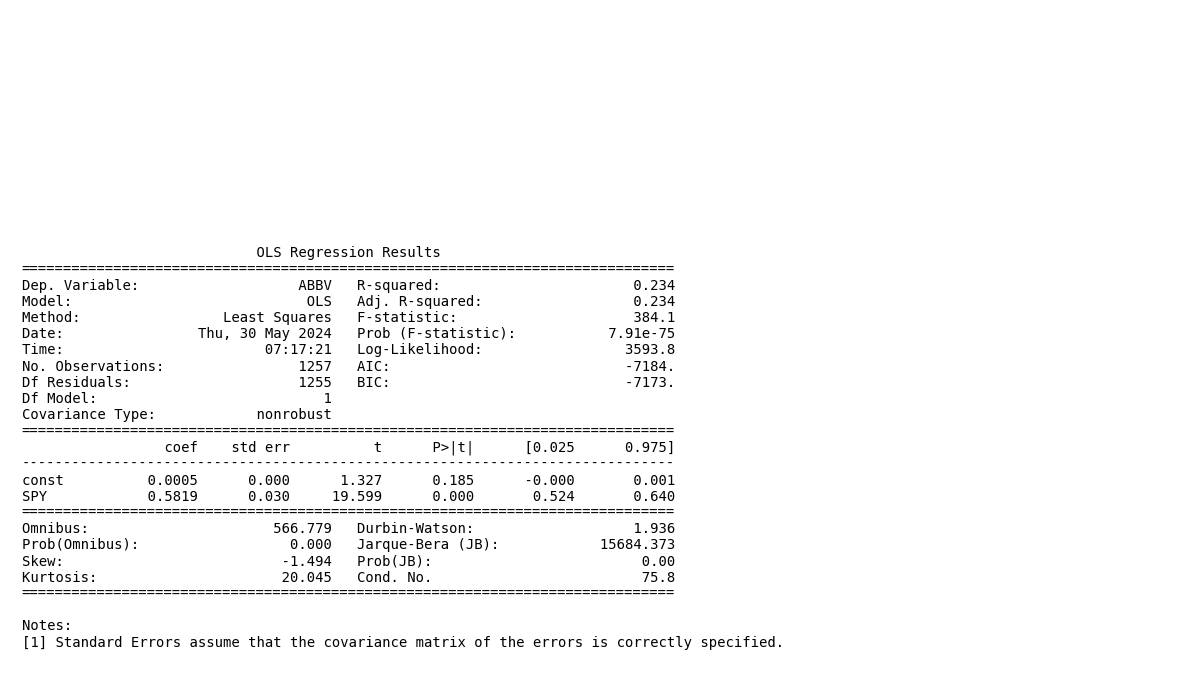

In [225]:
# save OLS Regression Results as a PNG
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

# AVGO

In [226]:
X1 = sm.add_constant(X)
model = sm.OLS(y_AVGO, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AVGO   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 30 May 2024   Prob (F-statistic):          9.04e-231
Time:                        07:17:21   Log-Likelihood:                 3456.7
No. Observations:                1257   AIC:                            -6909.
Df Residuals:                    1255   BIC:                            -6899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.676      0.0

In [227]:
from scipy import stats
slope_AVGO, intercept, r_value_AVGO, p_value, std_err = stats.linregress(X, y_AVGO)
beta_AVGO = slope_AVGO

In [228]:
r_value_AVGO

0.7534315613376857

In [229]:
r2_AVGO = r_value_AVGO ** 2
r2_AVGO

0.5676591176197429

# AXP

In [230]:
X1 = sm.add_constant(X)
model = sm.OLS(y_AXP, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AXP   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1436.
Date:                Thu, 30 May 2024   Prob (F-statistic):          3.81e-210
Time:                        07:17:21   Log-Likelihood:                 3386.5
No. Observations:                1257   AIC:                            -6769.
Df Residuals:                    1255   BIC:                            -6759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.301e-05      0.000      0.136      0.8

In [231]:
from scipy import stats
slope_AXP, intercept, r_value_AXP, p_value, std_err = stats.linregress(X, y_AXP)
print(slope_AXP)
beta_AXP = slope_AXP

1.3269675078965635


In [232]:
r_value_AXP

0.7305419815332412

In [233]:
r2_AXP = r_value_AXP ** 2
r2_AXP

0.5336915867825146

# BA

In [234]:
X1 = sm.add_constant(X)
model = sm.OLS(y_BA, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     BA   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     733.2
Date:                Thu, 30 May 2024   Prob (F-statistic):          1.55e-127
Time:                        07:17:21   Log-Likelihood:                 2837.7
No. Observations:                1257   AIC:                            -5671.
Df Residuals:                    1255   BIC:                            -5661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.001     -1.276      0.2

In [235]:
from scipy import stats
slope_BA, intercept, r_value_BA, p_value, std_err = stats.linregress(X, y_BA)
beta_BA = slope_BA

In [236]:
r_value_BA

0.6072592707754377

In [237]:
r2_BA = r_value_BA ** 2
r2_BA

0.3687638219427164

# CMG

In [238]:
X1 = sm.add_constant(X)
model = sm.OLS(y_CMG, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CMG   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     659.7
Date:                Thu, 30 May 2024   Prob (F-statistic):          2.87e-117
Time:                        07:17:21   Log-Likelihood:                 3273.5
No. Observations:                1257   AIC:                            -6543.
Df Residuals:                    1255   BIC:                            -6533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.667      0.0

In [239]:
from scipy import stats
slope_CMG, intercept, r_value_CMG, p_value, std_err = stats.linregress(X, y_CMG)
beta_CMG = slope_CMG
beta_CMG

0.98395242978759

In [240]:
r_value_CMG

0.5869929002372001

In [241]:
r2_CMG = r_value_CMG ** 2

# CAT

In [242]:
X1 = sm.add_constant(X)
model = sm.OLS(y_CAT, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CAT   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     827.6
Date:                Thu, 30 May 2024   Prob (F-statistic):          3.37e-140
Time:                        07:17:21   Log-Likelihood:                 3431.9
No. Observations:                1257   AIC:                            -6860.
Df Residuals:                    1255   BIC:                            -6850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.119      0.2

In [243]:
from scipy import stats
slope_CAT, intercept, r_value_CAT, p_value, std_err = stats.linregress(X, y_CAT)
beta_CAT = slope_CAT
beta_CAT

0.9715432792154077

In [244]:
r_value_CAT

0.6303851806675191

In [245]:
r2_CAT = r_value_CAT
r2_CAT

0.6303851806675191

# CVX

In [246]:
X1 = sm.add_constant(X)
model = sm.OLS(y_CVX, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CVX   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     722.4
Date:                Thu, 30 May 2024   Prob (F-statistic):          4.65e-126
Time:                        07:17:21   Log-Likelihood:                 3282.4
No. Observations:                1257   AIC:                            -6561.
Df Residuals:                    1255   BIC:                            -6551.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.33e-05      0.001      0.046      0.9

In [247]:
from scipy import stats
slope_CVX, intercept, r_value_CVX, p_value, std_err = stats.linregress(X, y_CVX)
beta_CVX = slope_CVX

In [248]:
r2_CVX = r_value_CVX ** 2
r_value_CVX, r2_CVX

(0.6044297457729539, 0.36533531757515775)

# JPM

In [249]:
X1 = sm.add_constant(X)
model = sm.OLS(y_JPM, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1408.
Date:                Thu, 30 May 2024   Prob (F-statistic):          2.83e-207
Time:                        07:17:21   Log-Likelihood:                 3603.5
No. Observations:                1257   AIC:                            -7203.
Df Residuals:                    1255   BIC:                            -7193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.836e-05      0.000      0.201      0.8

In [250]:
from scipy import stats
slope_JPM, intercept, r_value_JPM, p_value, std_err = stats.linregress(X, y_JPM)
beta_JPM = slope_JPM

In [251]:
r_value_JPM

0.727156627578518

In [252]:
r2_JPM = r_value_JPM**2
r2_JPM

0.5287567610313635

# KO

In [253]:
X1 = sm.add_constant(X)
model = sm.OLS(y_KO, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     KO   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     936.7
Date:                Thu, 30 May 2024   Prob (F-statistic):          3.94e-154
Time:                        07:17:21   Log-Likelihood:                 4005.0
No. Observations:                1257   AIC:                            -8006.
Df Residuals:                    1255   BIC:                            -7996.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.983e-06      0.000      0.018      0.9

In [254]:
from scipy import stats
slope_JPM, intercept, r_value_KO, p_value, std_err = stats.linregress(X, y_KO)
beta_KO = slope_JPM

In [255]:
r_value_KO

0.6537461410480424

In [256]:
r2_KO = r_value_KO ** 2
r_value_KO, r2_KO

(0.6537461410480424, 0.42738401693520695)

# LYB

In [257]:
model = sm.OLS(y_LYB, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    LYB   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     836.1
Date:                Thu, 30 May 2024   Prob (F-statistic):          2.61e-141
Time:                        07:17:21   Log-Likelihood:                 3148.2
No. Observations:                1257   AIC:                            -6292.
Df Residuals:                    1255   BIC:                            -6282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.591e-05      0.001     -0.046      0.9

In [258]:
from scipy import stats
slope_JPM, intercept, r_value_LYB , p_value, std_err = stats.linregress(X, y_LYB)
beta_LYB = slope_JPM

In [259]:
stats.linregress(X, y_LYB)

LinregressResult(slope=1.2237766394756273, intercept=-2.59060157977634e-05, rvalue=0.6323226317575072, pvalue=2.614092410843667e-141, stderr=0.042323153540510264, intercept_stderr=0.0005587916165209162)

In [260]:
r2_LYB = r_value_LYB ** 2
r_value_LYB, r2_LYB

(0.6323226317575072, 0.3998319106327401)

# NVDA

In [261]:
model = sm.OLS(y_NVDA, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1263.
Date:                Thu, 30 May 2024   Prob (F-statistic):          5.40e-192
Time:                        07:17:21   Log-Likelihood:                 2948.1
No. Observations:                1257   AIC:                            -5892.
Df Residuals:                    1255   BIC:                            -5882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      2.876      0.0

In [262]:
from scipy import stats
slope_NVDA, intercept, r_value_NVDA , p_value, std_err = stats.linregress(X, y_NVDA)
beta_NVDA = slope_NVDA

In [263]:
r2_NVDA = r_value_NVDA ** 2
r_value_NVDA, r2_NVDA

(0.7082374504164752, 0.5016002861724292)

# TSLA

In [264]:
model = sm.OLS(y_TSLA, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     405.9
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.96e-78
Time:                        07:17:21   Log-Likelihood:                 2405.9
No. Observations:                1257   AIC:                            -4808.
Df Residuals:                    1255   BIC:                            -4797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      1.774      0.0

In [265]:
from scipy import stats
slope_TSLA, intercept, r_value_TSLA, p_value, std_err = stats.linregress(X, y_TSLA)
beta_TSLA = slope_TSLA
beta_TSLA

1.5390536675067148

In [266]:
r2_TSLA = r_value_TSLA ** 2
r_value_TSLA, r2_TSLA

(0.49435022457120503, 0.24438214453360085)

# VZ

In [267]:
model = sm.OLS(y_VZ, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     VZ   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     324.0
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.31e-64
Time:                        07:17:21   Log-Likelihood:                 3808.1
No. Observations:                1257   AIC:                            -7612.
Df Residuals:                    1255   BIC:                            -7602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.832      0.4

In [268]:
from scipy import stats
slope_VZ, intercept, r_value_VZ, p_value, std_err = stats.linregress(X, y_VZ)
beta_VZ = slope_VZ

In [269]:
r2_VZ = r_value_VZ **2
r_value_VZ, r2_VZ

(0.45295866603500545, 0.2051715531362116)

# HACER UN DATAFRAME DEL BETA Y EL R2

In [270]:
returns.columns

Index(['ABBV', 'AVGO', 'AXP', 'BA', 'CAT', 'CMG', 'CVX', 'JPM', 'KO', 'LYB',
       'NVDA', 'SPY', 'TSLA', 'VZ'],
      dtype='object', name='Ticker')

In [271]:

data_betas = {
    'ABBV': [beta_ABBV],
    'AVGO': [beta_AVGO],
    'AXP': [beta_AXP],
    'BA' : [beta_BA],
    'CMG': [beta_CMG],
    'CAT': [beta_CAT],
    'CVX': [beta_CVX],
    'JPM': [beta_JPM],
    'KO' : [beta_KO],
    'LYB': [beta_LYB],
    'NVDA': [beta_NVDA],
    'TSLA': [beta_TSLA],
    'VZ': [beta_VZ]
    
}
df_betas = pd.DataFrame(data_betas, index=["Beta"])

print(df_betas)

          ABBV      AVGO       AXP        BA       CMG       CAT       CVX  \
Beta  0.581887  1.344112  1.326968  1.467107  0.983952  0.971543  1.022334   

           JPM        KO       LYB      NVDA      TSLA        VZ  
Beta  1.105622  0.655147  1.223777  1.763638  1.539054  0.450622  


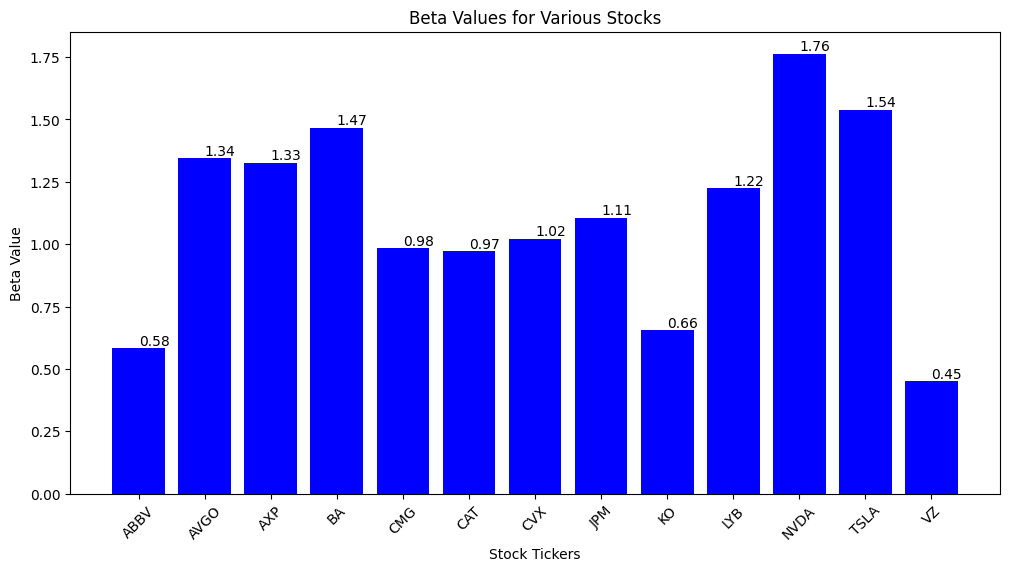

In [272]:
import matplotlib.pyplot as plt

# Asumiendo que df_betas es tu DataFrame que contiene una fila 'Beta' con las betas para cada ticker
plt.figure(figsize=(12, 6))
bars = plt.bar(df_betas.columns, df_betas.loc['Beta'], color='blue')

# Título y etiquetas del eje
plt.title('Beta Values for Various Stocks')
plt.xlabel('Stock Tickers')
plt.ylabel('Beta Value')

# Rotación de los ticks en el eje X
plt.xticks(rotation=45)

# Añadiendo anotaciones de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

plt.show()



In [273]:
data_r2 = {
    'ABBV': [r2_ABBV],
    'AVGO': [r2_AVGO],
    'AXP': [r2_AXP],
    'BA' : [r2_BA],
    'CMG': [r2_CMG],
    'CAT': [r2_CAT],
    'CVX': [r2_CVX],
    'JPM': [r2_JPM],
    'KO' : [r2_KO],
    'LYB': [r2_LYB],
    'NVDA': [r2_NVDA],
    'TSLA': [r2_TSLA],
    'VZ': [r2_VZ]
    
}
df_r2 = pd.DataFrame(data_r2, index=["r2"])

print(df_r2)

        ABBV      AVGO       AXP        BA       CMG       CAT       CVX  \
r2  0.234342  0.567659  0.533692  0.368764  0.344561  0.630385  0.365335   

         JPM        KO       LYB    NVDA      TSLA        VZ  
r2  0.528757  0.427384  0.399832  0.5016  0.244382  0.205172  


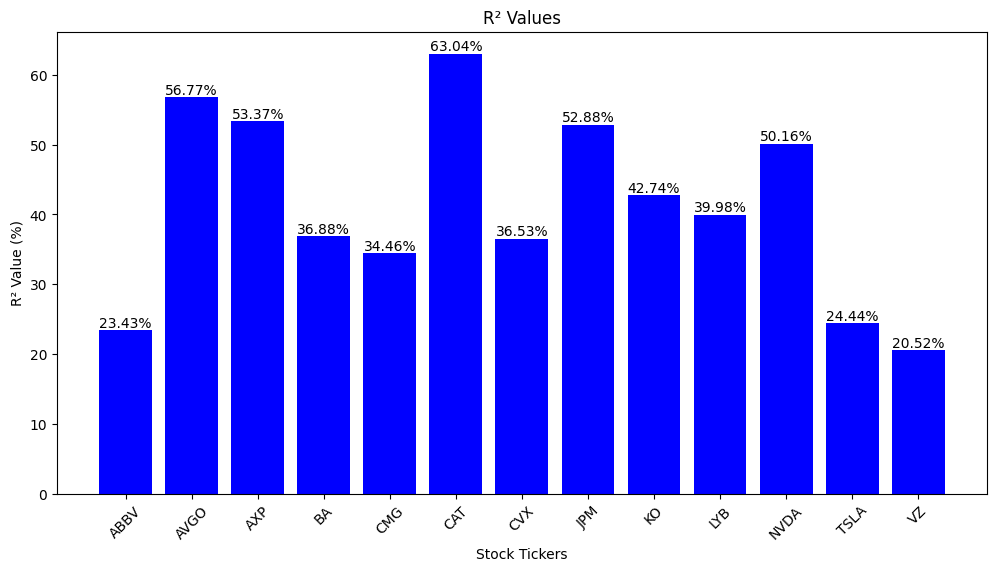

In [274]:
import matplotlib.pyplot as plt

# Suponiendo que df_r2 es tu DataFrame con los valores R²
plt.figure(figsize=(12, 6))
bars = plt.bar(df_r2.columns, df_r2.loc['r2'] * 100, color='blue')  # Multiplica por 100 para convertir a porcentaje

plt.title('R² Values')
plt.xlabel('Stock Tickers')
plt.ylabel('R² Value (%)')

# Añadir texto sobre cada barra en la gráfica mostrando el valor de R² en porcentaje
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')  

plt.xticks(rotation=45)
plt.show()


In [275]:
df_betas = pd.DataFrame({
    'Beta': {
        'ABBV': beta_ABBV,
        'AVGO': beta_AVGO,
        'AXP': beta_AXP,
        'BA': beta_BA,
        'CMG': beta_CMG,
        'CAT': beta_CAT,
        'CVX': beta_CVX,
        'JPM': beta_JPM,
        'KO': beta_KO,
        'LYB': beta_LYB,
        'NVDA': beta_NVDA,
        'TSLA': beta_TSLA,
        'VZ': beta_VZ
    }
})

df_r2 = pd.DataFrame({
    'R2': {
        'ABBV': r2_ABBV,
        'AVGO': r2_AVGO,
        'AXP': r2_AXP,
        'BA': r2_BA,
        'CMG': r2_CMG,
        'CAT': r2_CAT,
        'CVX': r2_CVX,
        'JPM': r2_JPM,
        'KO': r2_KO,
        'LYB': r2_LYB,
        'NVDA': r2_NVDA,
        'TSLA': r2_TSLA,
        'VZ': r2_VZ
    }
})

df_combined = pd.concat([df_betas, df_r2], axis=1)

print(df_combined)


          Beta        R2
ABBV  0.581887  0.234342
AVGO  1.344112  0.567659
AXP   1.326968  0.533692
BA    1.467107  0.368764
CMG   0.983952  0.344561
CAT   0.971543  0.630385
CVX   1.022334  0.365335
JPM   1.105622  0.528757
KO    0.655147  0.427384
LYB   1.223777  0.399832
NVDA  1.763638  0.501600
TSLA  1.539054  0.244382
VZ    0.450622  0.205172


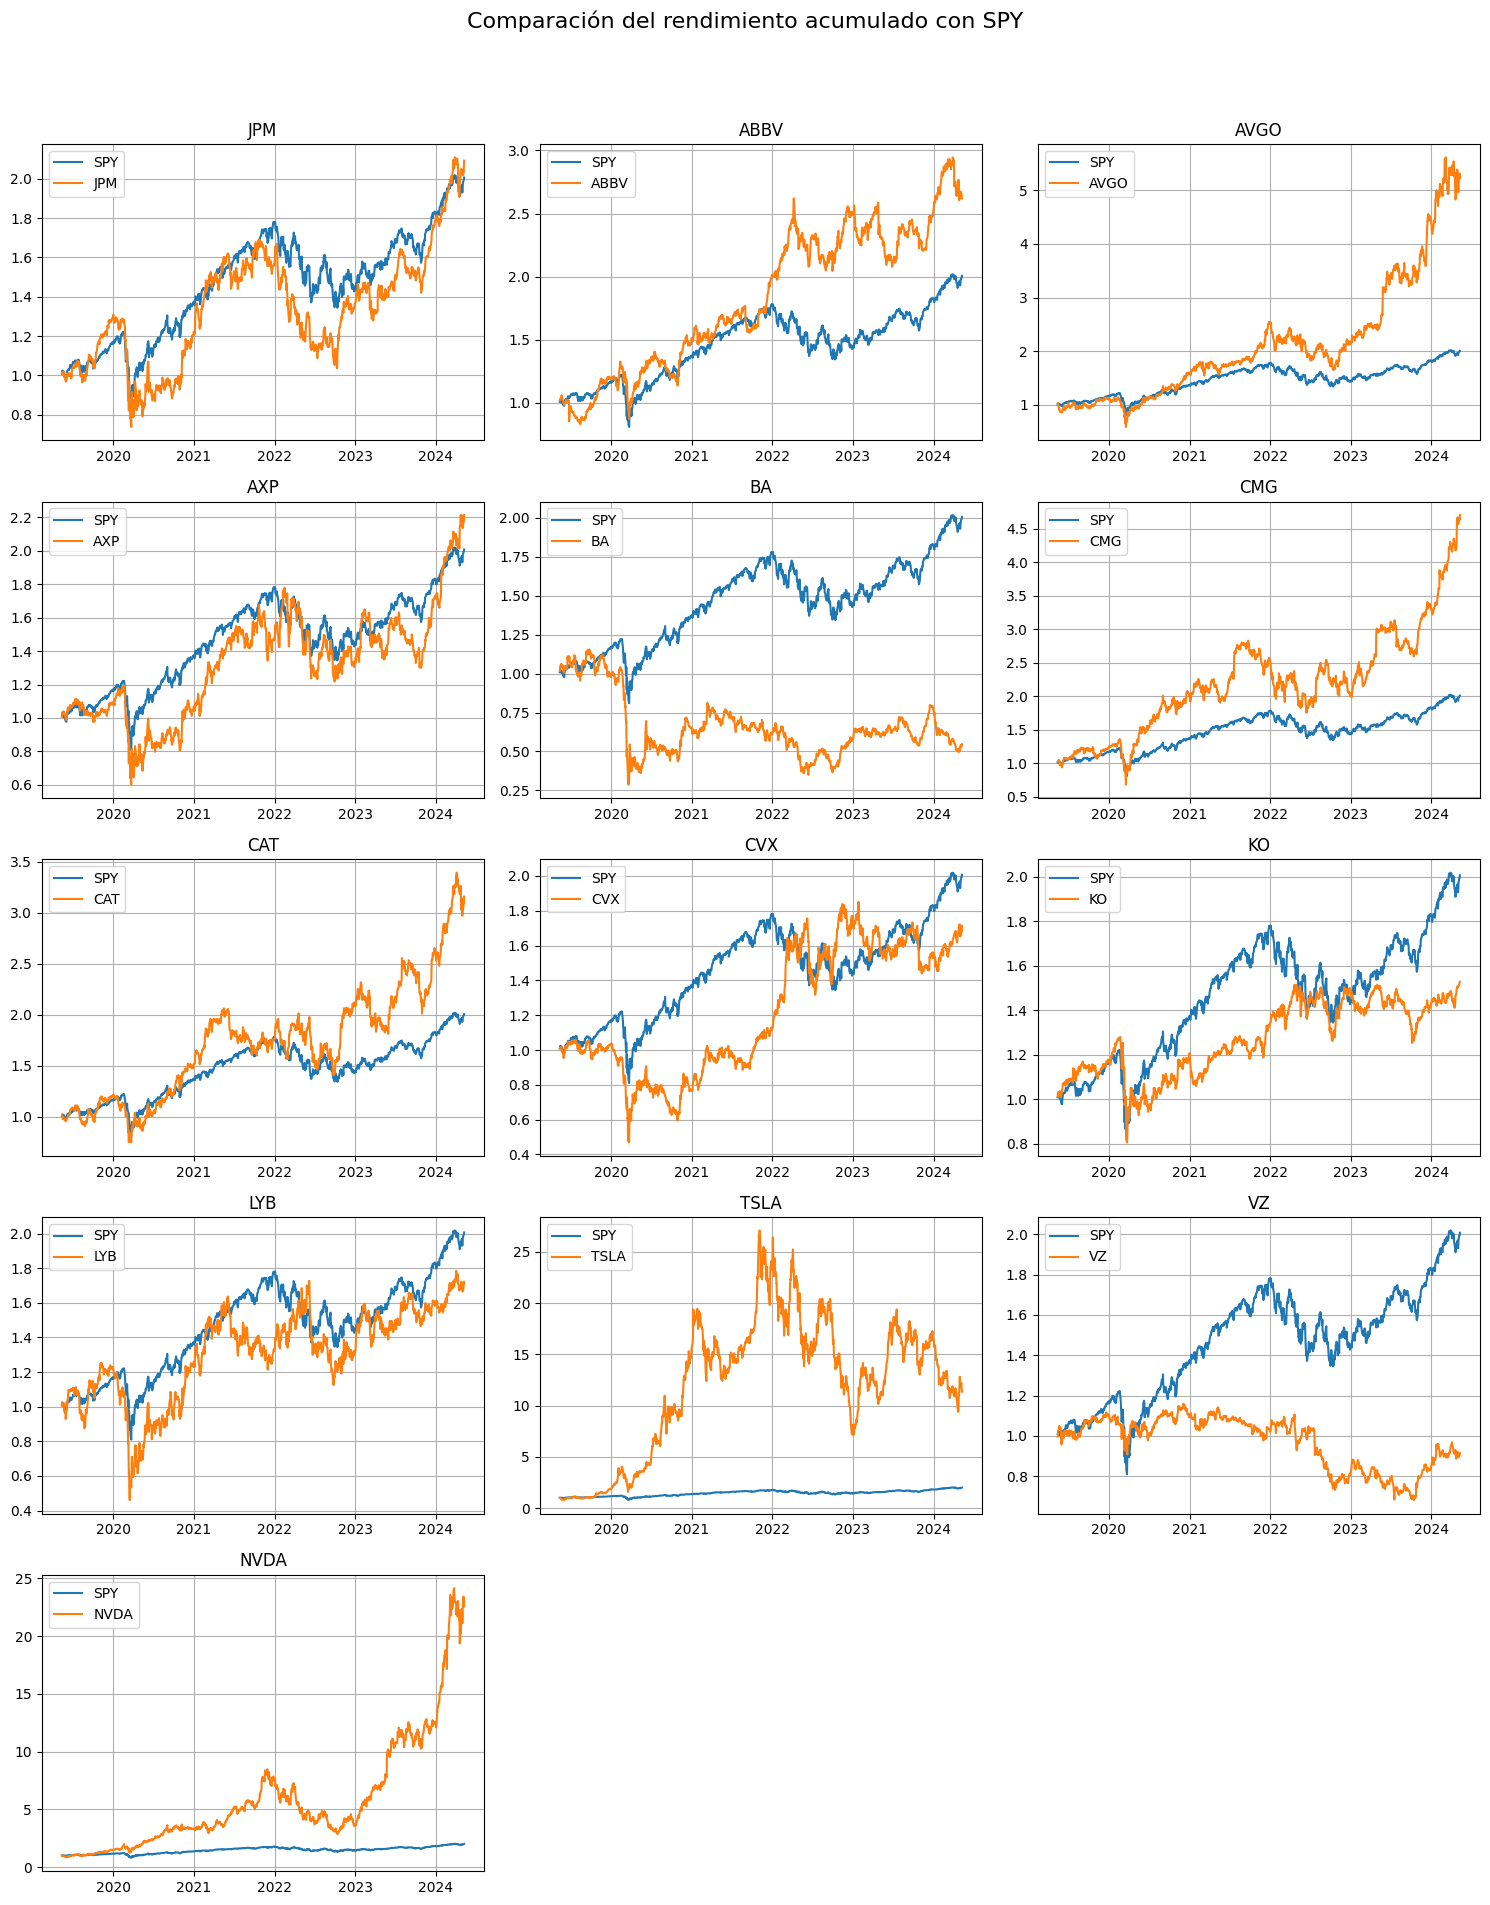

In [276]:
import matplotlib.pyplot as plt

# Asumiendo que 'returns' es tu DataFrame que contiene los retornos de todas las acciones
tickers = ['JPM', 'ABBV', 'AVGO', 'AXP', 'BA', 'CMG', 'CAT', 'CVX', 'KO', 'LYB', 'TSLA', 'VZ', 'NVDA']

# Cálculo de rendimiento acumulado para SPY y otras acciones
returns['Cum_SPY'] = (1 + returns['SPY']).cumprod()

fig, axs = plt.subplots(5, 3, figsize=(15, 20))  # Ajusta el tamaño según la necesidad
fig.suptitle('Comparación del rendimiento acumulado con SPY', fontsize=16)

axs = axs.flatten()  # Esto convierte la matriz de ejes en una lista plana para facilitar la iteración

for i, ticker in enumerate(tickers):
    returns['Cum_' + ticker] = (1 + returns[ticker]).cumprod()
    axs[i].plot(returns['Cum_SPY'], label='SPY')
    axs[i].plot(returns['Cum_' + ticker], label=ticker)
    axs[i].set_title(ticker)
    axs[i].legend(loc='upper left')
    axs[i].grid(True)

# Eliminar subplots vacíos si existen
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [277]:
df_combined.to_csv('data_CAPM.csv', index=True)